# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd

---
## 2. Load data

In [2]:
df = pd.read_csv('/content/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [3]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.126997                0.095024   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.049213                   41.908233   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               16.291553                   10.861037               42.035230   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0           16.386577               10.910249      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  

[3 rows x 53 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('/content/4.2 Price Data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

Let's have a look at each of the dataframes to understand it.

In [6]:
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

In [7]:
jan_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3  0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4  00114d74e963e47177db89bc70108537 2015-01-01            0.149434   

   price_off_peak_fix  
0           40.565969  
1           44.266931  
2           44.444710  
3           40.565969  
4           44.266931

In [8]:
dec_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4  00114d74e963e47177db89bc70108537 2015-12-01            0.145440   

   price_off_peak_fix  
0           40.728885  
1           44.444710  
2           45.944710  
3           40.728885  
4           44.266930

Let's merge the new feature into our existing features.

In [9]:
data = pd.merge(df, diff, on="id")
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.049213                   41.908233   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               16.291553                   10.861037               42.035230   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  \
0           16.386577               10.910249      1   
1            0.000000                0.000000      0   
2            0.088409                0.000000      0   
3            0.000000                0.000000      0   
4           24.539003               16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

Let's try making similar features, but instead of off peak we can try to do the same with mid peak and peak.

In [10]:
# Group peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['peak_diff_dec_january_var'] = diff['dec_1'] - diff['price_peak_var']
diff['peak_diff_dec_january_fix'] = diff['dec_2'] - diff['price_peak_fix']
diff = diff[['id', 'peak_diff_dec_january_var','peak_diff_dec_january_fix']]
diff.head()

id  peak_diff_dec_january_var  \
0  0002203ffbb812588b632b9e628cc38d                  -0.002302   
1  0004351ebdd665e6ee664792efc4fd13                   0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c                   0.000000   
3  0010ee3855fdea87602a5b7aba8e42de                  -0.005120   
4  00114d74e963e47177db89bc70108537                   0.000000   

   peak_diff_dec_january_fix  
0                   0.097749  
1                   0.000000  
2                   0.000000  
3                   0.097749  
4                   0.000000

In [11]:
# Merging the dataframes
data2 = pd.merge(data, diff, on="id")
data2.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               16.291553                   10.861037               42.035230   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  \
0           16.386577               10.910249      1   
1            0.000000                0.000000      0   
2            0.088409                0.000000      0   
3            0.000000                0.000000      0   
4           24.539003               16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

   peak_diff_dec_january_var  peak_diff_dec_january_fix  
0                  -0.017912                 -24.339581  
1                   0.000000                   0.000000  
2                   0.000528                   0.000000  
3                   0.000000                   0.000000  
4                  -0.002302                   0.097749  

[5 rows x 57 columns]

In [12]:
# Group mid-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_mid_peak_var': 'dec_1', 'price_mid_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['mid_peak_diff_dec_january_var'] = diff['dec_1'] - diff['price_mid_peak_var']
diff['mid_peak_diff_dec_january_fix'] = diff['dec_2'] - diff['price_mid_peak_fix']
diff = diff[['id', 'mid_peak_diff_dec_january_var','mid_peak_diff_dec_january_fix']]
diff.head()

id  mid_peak_diff_dec_january_var  \
0  0002203ffbb812588b632b9e628cc38d                       0.003487   
1  0004351ebdd665e6ee664792efc4fd13                       0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c                       0.000000   
3  0010ee3855fdea87602a5b7aba8e42de                       0.000763   
4  00114d74e963e47177db89bc70108537                       0.000000   

   mid_peak_diff_dec_january_fix  
0                       0.065166  
1                       0.000000  
2                       0.000000  
3                       0.065166  
4                       0.000000

In [13]:
data3 = pd.merge(data2, diff, on="id")
data3.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak  mean_3m_price_peak  mean_3m_price_mid_peak  churn  \
0               42.035230           16.386577               10.910249      1   
1               44.592310            0.000000                0.000000      0   
2               44.612508            0.088409                0.000000      0   
3               44.593296            0.000000                0.000000      0   
4               40.848791           24.539003               16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

   peak_diff_dec_january_var  peak_diff_dec_january_fix  \
0                  -0.017912                 -24.339581   
1                   0.000000                   0.000000   
2                   0.000528                   0.000000   
3                   0.000000                   0.000000   
4                  -0.002302                   0.097749   

   mid_peak_diff_dec_january_var  mid_peak_diff_dec_january_fix  
0                      -0.071536                     -16.226389  
1                       0.000000                       0.000000  
2                       0.000000                       0.000000  
3                       0.000000                       0.000000  
4                       0.003487                       0.065166  

[5 rows x 59 columns]

#### Mean difference in prices

Calculating mean difference in prices during different periods of the year might help us predict our target properly. Let's try to generate this feature.

In [14]:
avg_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean',
                                                        'price_peak_var' : 'mean',
                                                        'price_mid_peak_var' : 'mean',
                                                        'price_off_peak_fix': 'mean',
                                                        'price_peak_fix' : 'mean',
                                                        'price_mid_peak_fix' : 'mean'}).reset_index()

In [15]:
avg_prices['diff_var_off_peak'] = avg_prices['price_off_peak_var'] - avg_prices['price_peak_var']
avg_prices['diff_var_off_mid'] = avg_prices['price_off_peak_var'] - avg_prices['price_mid_peak_var']
avg_prices['diff_var_mid_peak'] = avg_prices['price_mid_peak_var'] - avg_prices['price_peak_var']
avg_prices['diff_fix_off_peak'] = avg_prices['price_off_peak_fix'] - avg_prices['price_peak_fix']
avg_prices['diff_fix_off_mid'] = avg_prices['price_off_peak_fix'] - avg_prices['price_mid_peak_fix']
avg_prices['diff_fix_mid_peak'] = avg_prices['price_mid_peak_fix'] - avg_prices['price_peak_fix']

In [16]:
avg_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0            0.073160           40.701732       24.421038           16.280694   
1            0.000000           44.385450        0.000000            0.000000   
2            0.000000           45.319710        0.000000            0.000000   
3            0.069032           40.647427       24.388455           16.258971   
4            0.000000           44.266930        0.000000            0.000000   

   diff_var_off_peak  diff_var_off_mid  diff_var_mid_peak  diff_fix_off_peak  \
0           0.020545          0.051178          -0.030633          16.280694   
1           0.146426          0.146426           0.000000          44.385450   
2           0.181558          0.181558           0.000000          45.319710   
3           0.020465          0.049725          -0.029260          16.258972   
4           0.147926          0.147926           0.000000          44.266930   

   diff_fix_off_mid  diff_fix_mid_peak  
0         24.421038          -8.140345  
1         44.385450           0.000000  
2         45.319710           0.000000  
3         24.388456          -8.129484  
4         44.266930           0.000000

Here we have created features that tell us about differences in price in different periods namely `peak`, `off-peak` and `mid-peak`.

Merging these new features with old features.

In [17]:
data4 = pd.merge(data3, avg_prices[["id", "diff_var_off_peak", "diff_var_off_mid", "diff_var_mid_peak", "diff_fix_off_peak", "diff_fix_off_mid", "diff_fix_mid_peak"]], on="id")

In [18]:
data4.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   peak_diff_dec_january_var  peak_diff_dec_january_fix  \
0                  -0.017912                 -24.339581   
1                   0.000000                   0.000000   
2                   0.000528                   0.000000   
3                   0.000000                   0.000000   
4                  -0.002302                   0.097749   

   mid_peak_diff_dec_january_var  mid_peak_diff_dec_january_fix  \
0                      -0.071536                     -16.226389   
1                       0.000000                       0.000000   
2                       0.000000                       0.000000   
3                       0.000000                       0.000000   
4                       0.003487                       0.065166   

   diff_var_off_peak  diff_var_off_mid  diff_var_mid_peak  diff_fix_off_peak  \
0           0.024038          0.058257          -0.034219          18.590255   
1           0.142485          0.149609          -0.007124          44.311375   
2           0.082090          0.170512          -0.088421          44.385450   
3           0.151210          0.151210           0.000000          44.400265   
4           0.020536          0.051309          -0.030773          16.275263   

   diff_fix_off_mid  diff_fix_mid_peak  
0         26.040925          -7.450670  
1         44.311375           0.000000  
2         44.385450           0.000000  
3         44.400265           0.000000  
4         24.412893          -8.137629  

[5 rows x 65 columns]

#### Max prices over different periods

Just as we consider the mean difference in prices over the months, we may also want to examine the maximum prices for each period. Customers typically don't appreciate price increases for the same plans across different periods of the year.

In [19]:
max_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'max',
                                                        'price_peak_var' : 'max',
                                                        'price_mid_peak_var' : 'max',
                                                        'price_off_peak_fix': 'max',
                                                        'price_peak_fix' : 'max',
                                                        'price_mid_peak_fix' : 'max'}).reset_index()

In [20]:
max_prices = max_prices.rename(columns={
    'price_off_peak_var': 'max_price_off_peak_var',
    'price_peak_var' : 'max_price_peak_var',
    'price_mid_peak_var' : 'max_price_mid_peak_var',
    'price_off_peak_fix': 'max_price_off_peak_fix',
    'price_peak_fix' : 'max_price_peak_fix',
    'price_mid_peak_fix' : 'max_price_mid_peak_fix'
})

In [21]:
max_prices.head()

id  max_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                0.123086   
4  00114d74e963e47177db89bc70108537                0.149902   

   max_price_peak_var  max_price_mid_peak_var  max_price_off_peak_fix  \
0            0.105842                0.073773               40.728885   
1            0.000000                0.000000               44.444710   
2            0.000000                0.000000               45.944710   
3            0.100505                0.069463               40.728885   
4            0.000000                0.000000               44.266931   

   max_price_peak_fix  max_price_mid_peak_fix  
0            24.43733               16.291555  
1             0.00000                0.000000  
2             0.00000                0.000000  
3            24.43733               16.291555  
4             0.00000                0.000000

In [22]:
data5 = pd.merge(data4, max_prices, on="id")
data5.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  diff_var_mid_peak  \
0      2015-11-01   2015-06-23               0.00  ...          -0.034219   
1      2009-08-21   2015-08-31             189.95  ...          -0.007124   
2      2010-04-16   2015-04-17              47.96  ...          -0.088421   
3      2010-03-30   2015-03-31             240.04  ...           0.000000   
4      2010-01-13   2015-03-09             445.75  ...          -0.030773   

   diff_fix_off_peak  diff_fix_off_mid  diff_fix_mid_peak  \
0          18.590255         26.040925          -7.450670   
1          44.311375         44.311375           0.000000   
2          44.385450         44.385450           0.000000   
3          44.400265         44.400265           0.000000   
4          16.275263         24.412893          -8.137629   

   max_price_off_peak_var  max_price_peak_var  max_price_mid_peak_var  \
0                0.146033            0.103963                0.073873   
1                0.151367            0.085483                0.000000   
2                0.172468            0.089162                0.000000   
3                0.153133            0.000000                0.000000   
4                0.128067            0.105842                0.073773   

   max_price_off_peak_fix  max_price_peak_fix  max_price_mid_peak_fix  
0               44.266930            24.43733               16.291555  
1               44.444710             0.00000                0.000000  
2               44.444710             0.00000                0.000000  
3               44.444710             0.00000                0.000000  
4               40.728885            24.43733               16.291555  

[5 rows x 71 columns]

#### Additional Features

###### Duration:

We can create a new duration column to represent the customers' duration of contract with our client.

In [23]:
def date_diff(row):
    diff = row['date_end'] - row['date_activ']
    return diff.days

data5['total_days'] = data5.apply(date_diff, axis=1)
data5.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  diff_fix_off_peak  \
0      2015-11-01   2015-06-23               0.00  ...          18.590255   
1      2009-08-21   2015-08-31             189.95  ...          44.311375   
2      2010-04-16   2015-04-17              47.96  ...          44.385450   
3      2010-03-30   2015-03-31             240.04  ...          44.400265   
4      2010-01-13   2015-03-09             445.75  ...          16.275263   

   diff_fix_off_mid  diff_fix_mid_peak  max_price_off_peak_var  \
0         26.040925          -7.450670                0.146033   
1         44.311375           0.000000                0.151367   
2         44.385450           0.000000                0.172468   
3         44.400265           0.000000                0.153133   
4         24.412893          -8.137629                0.128067   

   max_price_peak_var  max_price_mid_peak_var  max_price_off_peak_fix  \
0            0.103963                0.073873               44.266930   
1            0.085483                0.000000               44.444710   
2            0.089162                0.000000               44.444710   
3            0.000000                0.000000               44.444710   
4            0.105842                0.073773               40.728885   

   max_price_peak_fix  max_price_mid_peak_fix  total_days  
0            24.43733               16.291555        1096  
1             0.00000                0.000000        2566  
2             0.00000                0.000000        2192  
3             0.00000                0.000000        2192  
4            24.43733               16.291555        2245  

[5 rows x 72 columns]

###### Converting date type columns to numeric

Let's also convert the rest of the dates in days, with the help of a reference date. We may consider this reference date as the end of the dataset i.e. 1 Jan 2016.

In [24]:
reference_date = pd.to_datetime('1/12/2016', format='%d/%m/%Y')
data5['date_activ_days'] = (reference_date - data5['date_activ']).dt.days
data5['date_end_days'] = (reference_date - data5['date_end']).dt.days
data5['date_modif_prod_days'] = (reference_date - data5['date_modif_prod']).dt.days
data5['date_renewal_days'] = (reference_date - data5['date_renewal']).dt.days
data5.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  max_price_peak_var  \
0      2015-11-01   2015-06-23               0.00  ...            0.103963   
1      2009-08-21   2015-08-31             189.95  ...            0.085483   
2      2010-04-16   2015-04-17              47.96  ...            0.089162   
3      2010-03-30   2015-03-31             240.04  ...            0.000000   
4      2010-01-13   2015-03-09             445.75  ...            0.105842   

   max_price_mid_peak_var  max_price_off_peak_fix  max_price_peak_fix  \
0                0.073873               44.266930            24.43733   
1                0.000000               44.444710             0.00000   
2                0.000000               44.444710             0.00000   
3                0.000000               44.444710             0.00000   
4                0.073773               40.728885            24.43733   

   max_price_mid_peak_fix  total_days  date_activ_days  date_end_days  \
0               16.291555        1096             1265            169   
1                0.000000        2566             2659             93   
2                0.000000        2192             2421            229   
3                0.000000        2192             2438            246   
4               16.291555        2245             2514            269   

   date_modif_prod_days  date_renewal_days  
0                   396                527  
1                  2659                458  
2                  2421                594  
3                  2438                611  
4                  2514                633  

[5 rows x 76 columns]

###### Dropping date columns

Dropping the date columns might make sense now since we already have columns that represent them and the model cannot capture datetime properly.

In [25]:
data5.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], inplace=True)
data5.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  max_price_peak_var  \
0                        0.114481  ...            0.103963   
1                        0.145711  ...            0.085483   
2                        0.165794  ...            0.089162   
3                        0.146694  ...            0.000000   
4                        0.116900  ...            0.105842   

   max_price_mid_peak_var  max_price_off_peak_fix  max_price_peak_fix  \
0                0.073873               44.266930            24.43733   
1                0.000000               44.444710             0.00000   
2                0.000000               44.444710             0.00000   
3                0.000000               44.444710             0.00000   
4                0.073773               40.728885            24.43733   

   max_price_mid_peak_fix  total_days  date_activ_days  date_end_days  \
0               16.291555        1096             1265            169   
1                0.000000        2566             2659             93   
2                0.000000        2192             2421            229   
3                0.000000        2192             2438            246   
4               16.291555        2245             2514            269   

   date_modif_prod_days date_renewal_days  
0                   396               527  
1                  2659               458  
2                  2421               594  
3                  2438               611  
4                  2514               633  

[5 rows x 72 columns]

###### Encoding categorical columns:

Machine learning algorithms cannnot understand categories, to help our model we can encode these columns. We will be using `pd.get_dummies()` for this.

In [26]:
new_data = pd.get_dummies(data5, columns=["channel_sales"], prefix="channel")
new_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  date_modif_prod_days  date_renewal_days  \
0                    0.098142  ...                   396                527   
1                    0.000000  ...                  2659                458   
2                    0.087899  ...                  2421                594   
3                    0.000000  ...                  2438                611   
4                    0.100015  ...                  2514                633   

   channel_MISSING  channel_epumfxlbckeskwekxbiuasklxalciiuu  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

  channel_sddiedcslfslkckwlfkdpoeeailfpeds  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 79 columns]

Deleting extra feature since we can already determine it's value given the other channel features.

In [27]:
new_data.drop(inplace = True, columns=['channel_usilxuppasemubllopkaafesmlibmsdf'])

We will do the same for `origin_up` and `has_gas`.

In [28]:
new_data = pd.get_dummies(new_data, columns=["origin_up"], prefix="origin")
new_data.drop(inplace=True, columns=['origin_ewxeelcelemmiwuafmddpobolfuxioce'])
new_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.098142  ...                                         0   
1                    0.000000  ...                                         0   
2                    0.087899  ...                                         0   
3                    0.000000  ...                                         0   
4                    0.100015  ...                                         0   

   channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
0                                         0               0   
1                                         0               0   
2                                         0               0   
3                                         0               0   
4                                         0               0   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        1   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_lxidpiddsbxsbosboudacockeimpuepw  \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_usapbepcfoloekilkwsdiboslwaxobdp  
0                                        0  
1                                        0  
2                                        0  
3                                     

In [29]:
new_data = pd.get_dummies(new_data, columns=["has_gas"], prefix="has_gas")
new_data.drop(inplace=True, columns=['has_gas_1'])
new_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
0                    0.098142  ...                                         0   
1                    0.000000  ...                                         0   
2                    0.087899  ...                                         0   
3                    0.000000  ...                                         0   
4                    0.100015  ...                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
0                                         0               0   
1                                         0               0   
2                                         0               0   
3                                         0               0   
4                                         0               0   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        1   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_lxidpiddsbxsbosboudacockeimpuepw  \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  
0                                        0          0  
1                                        0          1  
2                                        0          1  
3                                        0          1  
4                                        0          1  

[5 rows x 82 columns]

###### Skewness:

We have also observed high positive skewness in multiple columns of our dataset. It is imperative that we address this issue. There are several methods available for doing so, one of which is logarithmic transformation. We will take the base-10 logarithm of each column that exhibits significant positive skewness. After applying this transformation, the distribution may appear more normal.

In [30]:
columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m',
           'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',
           'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
           'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']

new_data[columns].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele    net_margin       pow_max  
count        14606.000000  14606.000000  14606.000000  
mean            24.562517    189.264522     18.135136  
std             20.230280    311.798130     13.534743  
min              0.000000      0.000000      3.300000  
25%             14.280000     50.712500     12.500000  
50%             21.640000    112.530000     13.856000  
75%             29.880000    243.097500     19.172500  
max            374.640000  24570.650000    320.000000

We will apply the log transformation only to those features which appear to have high standard deviation.

In [31]:
high_std = [col for col in columns if new_data[col].std() >= 50]
high_std

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_meter_rent_12m',
 'imp_cons',
 'net_margin']

In [32]:
import numpy as np

for col in high_std:
    new_data[col] = np.log10(new_data[col] + 1)

let's check the difference,

In [33]:
new_data[high_std].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_meter_rent_12m      imp_cons    net_margin  
count        14606.000000             14606.000000  14606.000000  14606.000000  
mean             1.784610                 1.517203      1.240750      2.010007  
std              1.584986                 0.571481      1.138322      0.551834  
min              0.000000                 0.000000      0.000000      0.000000  
25%              0.000000                 1.235023      0.000000      1.713596  
50%              2.498311                 1.296555      1.584275      2.055111  
75%              3.242231                 2.120673      2.289990      2.387563  
max              5.243970                 2.778376      4.177357      4.390434

We can see that all of the features are now normalized. None of them are highly skewed.

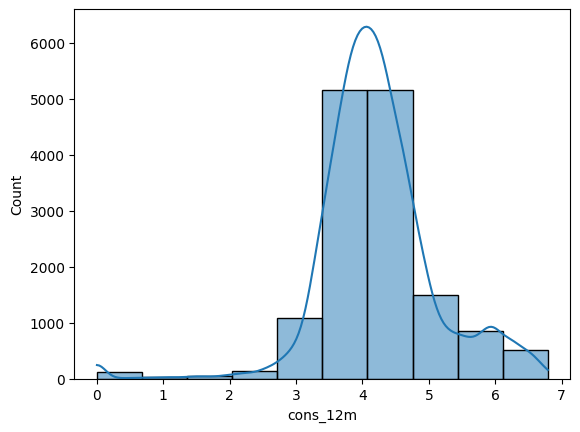

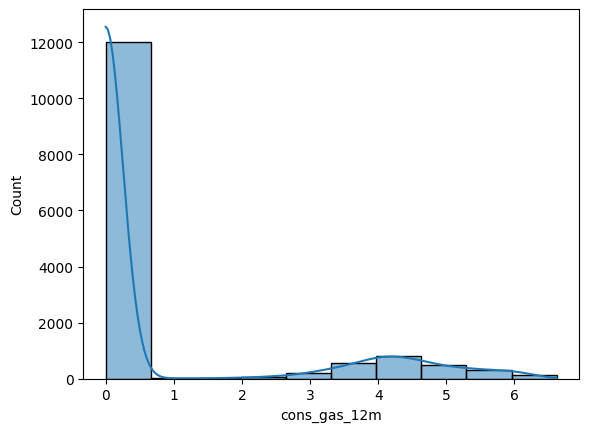

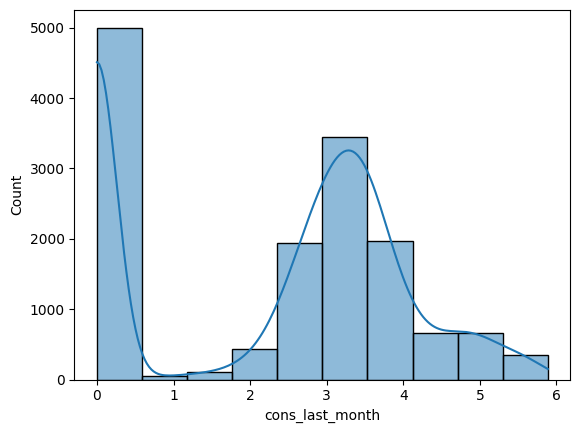

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(new_data['cons_12m'], bins=10, kde=True)
plt.show()

sns.histplot(new_data['cons_gas_12m'], bins=10, kde=True)
plt.show()

sns.histplot(new_data['cons_last_month'], bins=10, kde=True)
plt.show()

The features do seem to have normalized.

#### Correlation:

Now that we have added several features to our dataset, let's plot the correlation matrix and check how the variables correlate with churn.

In [35]:
correlation_mat = new_data.corr()

<ipython-input-35-acf1119f5dd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = new_data.corr()


In [36]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_mat,  annot=True, annot_kws={'size': 12}, cmap='Greens')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Modeling:

#### Data split:

We start by splitting the data into X and Y and then into training, testing datasets.

In [37]:
original_data = new_data.copy()  # saving a copy of old dataset

X = new_data.drop(columns =['id', 'churn'], axis=1)
Y = new_data['churn']

In [38]:
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
0                    40.606701  ...                                         0   
1                    44.311378  ...                                         0   
2                    44.311378  ...                                         0   
3                    44.311378  ...                                         0   
4                    40.606701  ...                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
0                                         0               0   
1                                         0               0   
2                                         0               0   
3                                         0               0   
4                                         0               0   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        1   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_lxidpiddsbxsbosboudacockeimpuepw  \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  
0                                        0          0  
1                                        0          1  
2                                        0          1  
3                                        0          1  
4                                        0          1  

[5 rows x 80 columns]

In [39]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

Now that we have divided the dataset into two different datasets for dependent (Y) and independent (X) variables. We can split the dataset into training and testing datasets. Usually a ratio of 70:30 or 80:20 is used for splitting the dataset into training and testing. We will be using the 75:25 ratio.

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [196]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10954, 80) (3652, 80) (10954,) (3652,)


#### Standardizing the dataset:

 Standardization is a crucial preprocessing step in many machine learning algorithms, as it helps improve convergence and performance. We will be applying the StandardScaler() function which will transform the data to have a mean of 0 and a standard deviation of 1 for each feature. This process standardizes the distribution of each feature, making them comparable and ensuring that they contribute equally to the analysis or model training process.

We should scale only the numeric columns as the categorical columns contain non-numeric values which could confuse our scaling process and potentially mislead the model. By excluding categorical columns from scaling, we ensure that the scaling process only affects the numeric features, maintaining the integrity of the categorical data for subsequent processing steps. This approach helps to prevent any unintended consequences that may arise from scaling non-numeric data and ensures that each feature type is treated appropriately during preprocessing.

In [197]:
non_categorical_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'mean_12m_price_off_peak_var', 'mean_12m_price_peak_var',
       'mean_12m_price_mid_peak_var', 'mean_12m_price_off_peak_fix',
       'mean_12m_price_peak_fix', 'mean_12m_price_mid_peak_fix',
       'mean_12m_price_off_peak', 'mean_12m_price_peak',
       'mean_12m_price_mid_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_price_off_peak',
       'mean_6m_price_peak', 'mean_6m_price_mid_peak',
       'mean_3m_price_off_peak_var', 'mean_3m_price_peak_var',
       'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
       'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix',
       'mean_3m_price_off_peak', 'mean_3m_price_peak',
       'mean_3m_price_mid_peak', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'peak_diff_dec_january_var',
       'peak_diff_dec_january_fix', 'mid_peak_diff_dec_january_var',
       'mid_peak_diff_dec_january_fix', 'diff_var_off_peak',
       'diff_var_off_mid', 'diff_var_mid_peak', 'diff_fix_off_peak',
       'diff_fix_off_mid', 'diff_fix_mid_peak', 'max_price_off_peak_var',
       'max_price_peak_var', 'max_price_mid_peak_var',
       'max_price_off_peak_fix', 'max_price_peak_fix',
       'max_price_mid_peak_fix', 'total_days', 'date_activ_days',
       'date_end_days', 'date_modif_prod_days', 'date_renewal_days']


Scaling the numeric features,

In [198]:
from sklearn.preprocessing import StandardScaler

X_train_og = X_train.copy()
X_test_og = X_test.copy()

scaler = StandardScaler()
scaler.fit(X_train[non_categorical_columns])
X_train[non_categorical_columns] = scaler.transform(X_train[non_categorical_columns])

# Add the remaining columns back after scaling
X_train = pd.concat([X_train[non_categorical_columns], X_train.drop(columns=non_categorical_columns)], axis=1)

# Repeat the same process for X_test
X_test[non_categorical_columns] = scaler.transform(X_test[non_categorical_columns])
X_test = pd.concat([X_test[non_categorical_columns], X_test.drop(columns=non_categorical_columns)], axis=1)


In [199]:
X_train.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
11674 -0.317555     -0.450269         0.386653           0.085878   
3728   0.360782     -0.450269         0.515946          -0.571829   
1041   0.372174      1.751655         0.671296           0.845008   
12195 -0.501157     -0.450269        -1.278584          -0.112269   
14334 -0.484522     -0.450269        -1.278584          -0.000725   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
11674            0.731915                 -0.187437                -0.414157   
3728            -1.126162                 -0.187437                -0.511752   
1041             1.036283                 -0.187437                 1.049348   
12195           -1.126162                 -0.187437                -0.502750   
14334           -1.126162                 -0.187437                 0.459346   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
11674                        1.224513                    0.774961   
3728                         0.389719                   -1.028320   
1041                        -0.876596                    0.998730   
12195                        1.271836                    0.798572   
14334                        0.349477                   -1.028320   

       forecast_price_pow_off_peak  ...  \
11674                     0.483831  ...   
3728                      0.260994  ...   
1041                     -0.567031  ...   
12195                     0.483831  ...   
14334                     0.260994  ...   

       channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
11674                                         0   
3728                                          0   
1041                                          0   
12195                                         0   
14334                                         0   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
11674                                         1   
3728                                          1   
1041                                          1   
12195                                         1   
14334                                         0   

       channel_lmkebamcaaclubfxadlmueccxoimlema  \
11674                                         0   
3728                                          0   
1041                                          0   
12195                                         0   
14334                                         0   

       channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
11674                                         0               0   
3728                                          0               0   
1041                                          0               0   
12195                                         0               0   
14334                                         0               0   

       origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
11674                                        0   
3728                                         0   
1041                                         0   
12195                                        0   
14334                                        1   

       origin_ldkssxwpmemidmecebumciepifcamkci  \
11674                                        0   
3728                                         0   
1041                                         0   
12195                                        1   
14334                                        0   

       origin_lxidpiddsbxsbosboudacockeimpuepw  \
11674                                        1   
3728                                         1   
1041                                         1   
12195                                        0   
14334                                        0   

       origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  
11674                                        0          1  
3728                                         0          1  
1041                          

In [200]:
X_test.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
4947  -0.049697      2.005844         0.510475           0.301389   
5868  -0.159884     -0.450269         0.418873           0.502727   
6805  -0.413745     -0.450269        -1.278584          -0.301027   
1323   0.143042     -0.450269        -1.278584           0.810945   
11759 -0.035956     -0.450269         0.618023           0.359584   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
4947             0.870075                 -0.187437                 0.973580   
5868             0.767865                  5.762680                -0.458850   
6805            -1.126162                 -0.187437                -0.398784   
1323            -1.126162                 -0.187437                -0.371571   
11759            0.990077                 -0.187437                 1.059720   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
4947                        -0.921381                    1.001360   
5868                         2.493979                   -1.028320   
6805                         0.174388                   -1.028320   
1323                         0.238332                   -1.028320   
11759                       -0.687834                    1.081672   

       forecast_price_pow_off_peak  ...  \
4947                     -0.567031  ...   
5868                      0.706669  ...   
6805                      0.260994  ...   
1323                      0.260994  ...   
11759                    -0.567031  ...   

       channel_fixdbufsefwooaasfcxdxadsiekoceaa  \
4947                                          0   
5868                                          0   
6805                                          0   
1323                                          0   
11759                                         0   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
4947                                          1   
5868                                          1   
6805                                          1   
1323                                          1   
11759                                         1   

       channel_lmkebamcaaclubfxadlmueccxoimlema  \
4947                                          0   
5868                                          0   
6805                                          0   
1323                                          0   
11759                                         0   

       channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
4947                                          0               0   
5868                                          0               0   
6805                                          0               0   
1323                                          0               0   
11759                                         0               0   

       origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
4947                                         0   
5868                                         0   
6805                                         0   
1323                                         0   
11759                                        0   

       origin_ldkssxwpmemidmecebumciepifcamkci  \
4947                                         0   
5868                                         0   
6805                                         0   
1323                                         0   
11759                                        1   

       origin_lxidpiddsbxsbosboudacockeimpuepw  \
4947                                         1   
5868                                         1   
6805                                         1   
1323                                         1   
11759                                        0   

       origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  
4947                                         0          0  
5868                                         0          1  
6805                          

### Model Selection and training:

For training, we will be using Random Forest as it was asked to be used.

**About Random Forest:**

Random Forest is a popular ensemble learning technique that operates by constructing a multitude of decision trees during training and outputting the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It operates by introducing randomness in the tree-building process, both in terms of the data sampled for training each tree and the features considered for splitting at each node.


**Model Building Process:**

1. **Data Preprocessing:** Before training the Random Forest model, the data undergoes preprocessing steps such as handling missing values, encoding categorical variables, and scaling numeric features (which we already did).

2. **Model Training:** The Random Forest model is trained using the preprocessed dataset. During training, multiple decision trees are constructed based on bootstrapped samples of the data and a random subset of features at each node.

3. **Model Evaluation:** The trained Random Forest model is evaluated using appropriate performance metrics such as accuracy, precision, recall, F1-score, or mean squared error, depending on the nature of the task (classification or regression).

4. **Model Interpretation:** Finally, the trained Random Forest model is interpreted to gain insights into feature importance, model behavior, and potential areas for improvement.


#### Model Training:

Let's train a random forest model with 100 estimators and a max depth of 10. We will be using grid search later to fine tune these.

In [201]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators = 1000, criterion="entropy", verbose = 2)

rf.fit(X_train, Y_train)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s


building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.7s


building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   22.0s


building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   48.3s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0,
                       verbose=2)

Let's test the accuracy of this initial model.

In [202]:
from sklearn.metrics import accuracy_score

y_pred_1 = rf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_1)
print(test_accuracy)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.5s


0.9044359255202629


89.93% is not bad, but we can experiment with the parameters and maybe get better accuracy. Let's save this model for now.

In [203]:
import joblib

# save model
joblib.dump(rf, "rf_model_v7.joblib")

['rf_model_v7.joblib']

#### Hyperparameter tuning:

We will be fine tuning our model in this stage. We will be using grid search for this, it is a powerful technique used to optimize several ML models. It tests combinations of different hyperparameters and chooses the configuration that maximizes model performance. We will be using the following parameter grid:

```python
param_grid = {
    'n_estimators' : [100, 500, 1200],
    'max_depth' : [10, 15, 25],
    'criterion' : ["gini", "entropy", "log_loss"]
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}
```

1. **n_estimators**:
   - This parameter determines the number of trees in the Random Forest.
   - Increasing the number of trees generally improves model performance up to a certain point, as it reduces the variance of the model and enhances its ability to generalize to unseen data.
   - However, a higher number of trees also increases computational time and memory requirements.
   - Common values for `n_estimators` range from a few hundred to a few thousand.

2. **max_depth**:
   - `max_depth` controls the maximum depth of each decision tree in the Random Forest.
   - A deeper tree can capture more complex relationships in the data, potentially leading to overfitting.
   - Conversely, a shallower tree may generalize better to unseen data but might not capture intricate patterns present in the data.

3. **min_samples_split**:
   - This parameter sets the minimum number of samples required to split an internal node during the construction of each decision tree.
   - Higher values of `min_samples_split` result in fewer splits and tend to produce simpler trees, reducing the risk of overfitting.
   - Conversely, lower values may lead to more complex trees that capture noise in the training data, increasing the risk of overfitting.

4. **min_samples_leaf**:
   - `min_samples_leaf` specifies the minimum number of samples required to be at a leaf node.
   - It controls the minimum size of terminal nodes (leaves) in the decision trees.
   - Larger values of `min_samples_leaf` result in simpler trees with fewer leaf nodes, potentially reducing overfitting.
   - Smaller values may lead to trees that capture noise in individual samples, increasing the risk of overfitting.

5. **criterion**:
   - This parameter determines the function used to measure the quality of a split in each decision tree.
   - Common criteria include "gini" for Gini impurity, "entropy" for information gain, and "log_loss" for cross-entropy loss.
   - Gini impurity and entropy measure the impurity or disorder of a set of data, with lower values indicating better splits.
   - Log loss (or cross-entropy loss) is a measure of the accuracy of the predicted probabilities compared to the actual binary outcomes.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier object
rf_2 = RandomForestClassifier(random_state=42, verbose=1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators' : [100, 500, 1200],
    'max_depth' : [10, 15, 25],
    'criterion' : ["gini", "entropy", "log_loss"]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_2, param_grid, cv=5, verbose = 2)

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Display best hyperparameters
best_params

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   6.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   5.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   4.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   5.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   3.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=10, n_estimators=500; total time=  11.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=10, n_estimators=500; total time=  11.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=10, n_estimators=500; total time=  10.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=10, n_estimators=500; total time=  10.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=10, n_estimators=500; total time=  11.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=10, n_estimators=1200; total time=  26.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   19.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s


[CV] END ....criterion=gini, max_depth=10, n_estimators=1200; total time=  28.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=10, n_estimators=1200; total time=  26.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   16.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=10, n_estimators=1200; total time=  25.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=10, n_estimators=1200; total time=  26.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   2.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   2.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   4.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   2.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   2.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=15, n_estimators=500; total time=  14.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=15, n_estimators=500; total time=  14.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=15, n_estimators=500; total time=  15.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=15, n_estimators=500; total time=  14.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=15, n_estimators=500; total time=  14.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   13.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   23.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=15, n_estimators=1200; total time=  35.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   22.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=15, n_estimators=1200; total time=  33.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   22.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=15, n_estimators=1200; total time=  34.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   23.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END ....criterion=gini, max_depth=15, n_estimators=1200; total time=  35.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   22.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=15, n_estimators=1200; total time=  34.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=25, n_estimators=100; total time=   3.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=25, n_estimators=100; total time=   3.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=25, n_estimators=100; total time=   3.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=25, n_estimators=100; total time=   3.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .....criterion=gini, max_depth=25, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=25, n_estimators=500; total time=  16.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=25, n_estimators=500; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=25, n_estimators=500; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .....criterion=gini, max_depth=25, n_estimators=500; total time=  16.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[CV] END .....criterion=gini, max_depth=25, n_estimators=500; total time=  16.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   26.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=25, n_estimators=1200; total time=  40.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=25, n_estimators=1200; total time=  40.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=25, n_estimators=1200; total time=  39.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=25, n_estimators=1200; total time=  39.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END ....criterion=gini, max_depth=25, n_estimators=1200; total time=  40.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=100; total time=   2.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=100; total time=   2.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=100; total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=100; total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=100; total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=500; total time=  12.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=500; total time=  12.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=500; total time=  12.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=500; total time=  12.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END ..criterion=entropy, max_depth=10, n_estimators=500; total time=  12.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=10, n_estimators=1200; total time=  30.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   12.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=10, n_estimators=1200; total time=  30.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=10, n_estimators=1200; total time=  30.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   19.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=10, n_estimators=1200; total time=  29.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=10, n_estimators=1200; total time=  31.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=100; total time=   3.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=100; total time=   3.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=100; total time=   3.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=500; total time=  16.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=500; total time=  16.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=500; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=500; total time=  16.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=15, n_estimators=500; total time=  16.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   26.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END .criterion=entropy, max_depth=15, n_estimators=1200; total time=  40.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[CV] END .criterion=entropy, max_depth=15, n_estimators=1200; total time=  40.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=15, n_estimators=1200; total time=  39.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   26.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=15, n_estimators=1200; total time=  39.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END .criterion=entropy, max_depth=15, n_estimators=1200; total time=  38.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=100; total time=   3.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=100; total time=   4.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=100; total time=   3.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=100; total time=   3.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=100; total time=   3.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=500; total time=  19.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=500; total time=  19.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=500; total time=  18.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=500; total time=  18.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ..criterion=entropy, max_depth=25, n_estimators=500; total time=  18.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END .criterion=entropy, max_depth=25, n_estimators=1200; total time=  44.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   17.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   30.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END .criterion=entropy, max_depth=25, n_estimators=1200; total time=  46.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END .criterion=entropy, max_depth=25, n_estimators=1200; total time=  43.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[CV] END .criterion=entropy, max_depth=25, n_estimators=1200; total time=  45.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END .criterion=entropy, max_depth=25, n_estimators=1200; total time=  43.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=100; total time=   2.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=100; total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=100; total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=100; total time=   2.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=500; total time=  12.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=500; total time=  13.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=500; total time=  13.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=500; total time=  12.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[CV] END .criterion=log_loss, max_depth=10, n_estimators=500; total time=  13.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=10, n_estimators=1200; total time=  30.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=10, n_estimators=1200; total time=  30.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   19.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=10, n_estimators=1200; total time=  31.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   19.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=10, n_estimators=1200; total time=  31.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=10, n_estimators=1200; total time=  31.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=100; total time=   3.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=100; total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=500; total time=  16.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=500; total time=  16.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=500; total time=  16.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=500; total time=  16.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=15, n_estimators=500; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=15, n_estimators=1200; total time=  39.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=15, n_estimators=1200; total time=  38.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=15, n_estimators=1200; total time=  39.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=15, n_estimators=1200; total time=  38.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[CV] END criterion=log_loss, max_depth=15, n_estimators=1200; total time=  38.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=100; total time=   3.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=100; total time=   4.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=100; total time=   3.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=100; total time=   3.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=100; total time=   3.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=500; total time=  19.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=500; total time=  17.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=500; total time=  18.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=500; total time=  17.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END .criterion=log_loss, max_depth=25, n_estimators=500; total time=  18.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[CV] END criterion=log_loss, max_depth=25, n_estimators=1200; total time=  44.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END criterion=log_loss, max_depth=25, n_estimators=1200; total time=  44.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END criterion=log_loss, max_depth=25, n_estimators=1200; total time=  43.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[CV] END criterion=log_loss, max_depth=25, n_estimators=1200; total time=  44.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   28.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[CV] END criterion=log_loss, max_depth=25, n_estimators=1200; total time=  43.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   20.5s


{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 500}

In [ ]:
# train model
rf_2 = RandomForestClassifier(random_state=42, **best_params, verbose = 2)
rf_2.fit(X_train, Y_train)

# make predictions and eval
y_pred_2 = rf_2.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_2)
print(test_accuracy)

# save model
joblib.dump(rf_2, "rf_model_v2.joblib")

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.3s


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   18.3s


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.4s


0.9032405294386125


['rf_model_v2.joblib']

Let's now fine tune `min_samples_split` and `min_samples_leaf`. We will be using grid search again.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier object
rf_3 = RandomForestClassifier(random_state=42, **best_params, verbose=1)

# Define the hyperparameter grid
param_grid = {
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_3, param_grid, cv=5, verbose = 2)

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Best hyperparameters
best_params_2 = grid_search.best_params_

# Display best hyperparameters
best_params_2

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   20.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=  22.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=  18.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=  17.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   17.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=5; total time=  19.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=5; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=5; total time=  18.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=5; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=1, min_samples_split=5; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=  17.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=  18.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=  17.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=  18.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=  18.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=  18.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=  17.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=5; total time=  18.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=5; total time=  18.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=5; total time=  17.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=5; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=2, min_samples_split=5; total time=  17.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=  18.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=  17.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=  18.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=2; total time=  16.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=2; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=2; total time=  17.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=2; total time=  16.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=2; total time=  17.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=  17.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=  17.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=  17.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=  17.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=  16.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=5, min_samples_split=10; total time=  16.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[CV] END ...........min_samples_leaf=5, min_samples_split=10; total time=  18.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=5, min_samples_split=10; total time=  17.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=5, min_samples_split=10; total time=  16.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[CV] END ...........min_samples_leaf=5, min_samples_split=10; total time=  17.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   20.2s


{'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
print(best_params, best_params_2)

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 500} {'min_samples_leaf': 1, 'min_samples_split': 2}


Since we got the best params, we can now set those parameters as our new model parameters and train the model.

In [79]:
rf_3 = RandomForestClassifier(**best_params, **best_params_2, verbose=2, random_state=42)
rf_3.fit(X_train, Y_train)

# make predictions and eval
y_pred_3 = rf_3.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_3)
print(test_accuracy)

# save model
joblib.dump(rf_3, "rf_model_v3.joblib")

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.8s


building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   12.0s


building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   21.9s


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.4s


0.9034687357371064


['rf_model_v3.joblib']

The accuracy stayed the same, let's evaluate this model now.

#### Model Evaluation

We will be using the following metrics to evaluate our model performance:

1. **Testing Accuracy**:
   - Testing accuracy evaluates how well the model performs on data giving an idea of how it generalizes.
   
2. **Confusion Matrix**:
   - The confusion matrix breaks down incorrect predictions helping to understand how the model behaves across categories.

3. **Classification Report**:
   - This report provides precision, recall and F1 score for each category giving a picture of the models performance beyond accuracy.

4. **ROC Curve and AUC Score**:
   - The ROC curve shows the balance between true positive rate (TPR) and false positive rate (FPR) while the AUC score indicates how well the model can differentiate between categories, particularly beneficial for datasets with imbalances.

5. **Precision Score and Recall Score**:
   - Precision calculates the proportion of identified predictions, among all positive predictions whereas recall measures the proportion of true positives correctly identified by the model providing insights into minimizing false positives or false negatives.

6. **K-Fold Cross Validation and Its Mean**:
   - K-fold cross validation is a method to gauge how well a model performs. It involves dividing the data into K parts training the model on K-1 parts and testing it on the remaining part. Calculating the average of these performance measures, across all parts ensures a evaluation, which helps reduce variability in assessing performance.

7. **F1 Score**:
   - The F1 score is a metric that considers both precision and recall offering an assessment of the models performance. This metric is particularly useful when dealing with imbalanced class distributions.


##### Testing accuracy:

In [115]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(Y_test, y_pred_1)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.9036969420356001


##### Classification report:

In [116]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(Y_test, y_pred_1)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.82      0.05      0.10       440

    accuracy                           0.90      4382
   macro avg       0.86      0.53      0.52      4382
weighted avg       0.90      0.90      0.86      4382



##### Confusion Matrix:

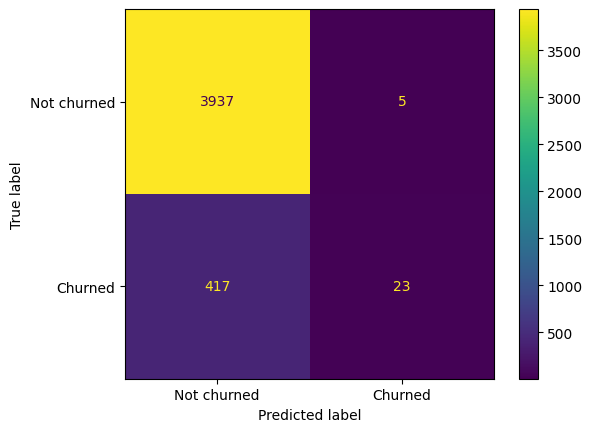

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the confusion matrix
cm = confusion_matrix(Y_test, y_pred_1)

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not churned', 'Churned'])

# Plot the confusion matrix
disp.plot()
plt.show()

##### Precision, recall and F1 score:

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_1).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {accuracy_score(Y_test, y_pred_3)}")
print(f"Precision: {precision_score(Y_test, y_pred_3)}")
print(f"Recall: {recall_score(Y_test, y_pred_3)}")
print(f"f1 score: {f1_score(Y_test, y_pred_3)}")

True positives: 23
False positives: 5
True negatives: 3937
False negatives: 417

Accuracy: 0.9034687357371064
Precision: 0.84
Recall: 0.04772727272727273
f1 score: 0.0903225806451613


##### ROC Curve and AUC score:

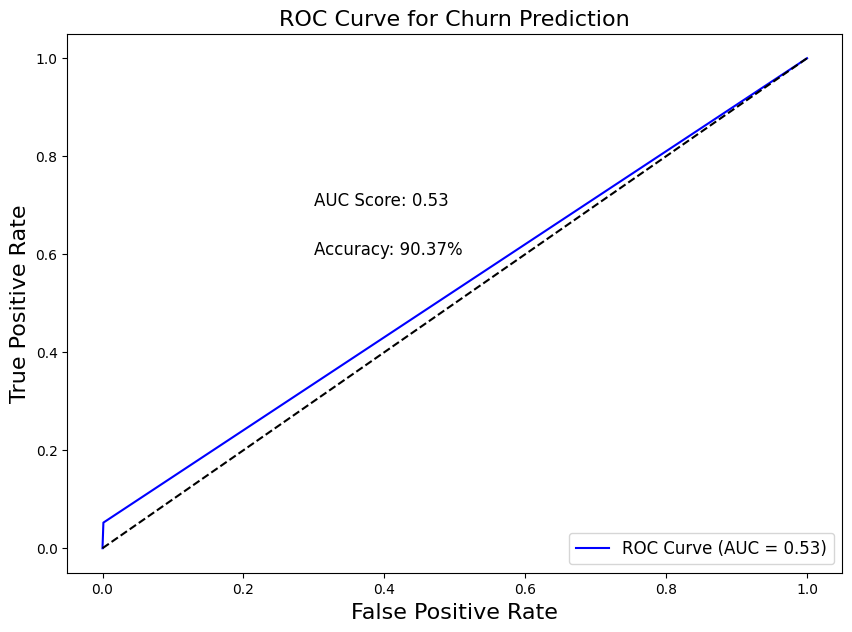

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_1)

# Calculate the AUC score
auc_score = roc_auc_score(Y_test, y_pred_1)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='b')

# Plot the baseline (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for Churn Prediction', fontsize=16)

# Add scores and text
plt.text(0.3, 0.7, 'AUC Score: {:.2f}'.format(auc_score), fontsize=12)
plt.text(0.3, 0.6, 'Accuracy: {:.2f}%'.format(test_accuracy * 100), fontsize=12)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show the plot
plt.show()


##### K-fold cross validation:

In [121]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, Y_train, cv = 5, scoring='accuracy', verbose=2)

print('Cross-validation scores:{}'.format(cv_scores))

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.9s


building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   19.1s


building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   30.7s


building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s


[CV] END .................................................... total time=  47.1s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s


building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    6.3s


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   16.2s


building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   28.4s


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s


[CV] END .................................................... total time=  48.8s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    9.1s


building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   16.4s


building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   27.5s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s


[CV] END .................................................... total time=  46.7s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s


building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    6.2s


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   16.9s


building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   30.5s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s


[CV] END .................................................... total time=  47.4s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   10.3s


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   19.1s


building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:   37.4s


building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s


[CV] END .................................................... total time=  55.3s
Cross-validation scores:[0.90953545 0.90953545 0.90513447 0.90660147 0.90900196]


[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.3s


###### Mean of K-fold cross validation:

In [123]:
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9080


##### Summary of evaluation:


| Metric      | ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ |   Value   |
|:------------|:--:|:--------:|
| Accuracy    | | 0.9036    |
| Precision   | |  0.8400  |
| Recall      | |  0.0477  |
| F1 score    | |  0.0903   |
| AUC score   | |  0.5300   |
| K-fold      | | 0.9080   |

</br>
</br>
**True positives**: 23
**False positives**: 5
**True negatives**: 3937
**False negatives**: 417
</br></br>


|    | precision | recall | f1-score | support |
|----|-----------|--------|----------|---------|
| 0  |    0.90   |  1.00  |   0.95   |   3942  |
| 1  |    0.82   |  0.05  |   0.10   |   440   |
|----|-----------|--------|----------|---------|
|    |           |        |          |         |
|accuracy |           |         |          |   0.90   |
|macro avg|   0.86  |   0.53 |   0.52   |   4382  |
|weighted avg|   0.90  |  0.90  |   0.86  |   4382  |

</br></br></br>


1. **Accuracy**: The model shows an accuracy of, around 90.36% meaning it accurately predicts the class label for 90% of the cases in the test set.

2. **Precision**: When it comes to predicting churn the precision stands at 84.00% indicating that when the model predicts a customer will churn it's right 84% of the time.

3. **Recall**: The recall rate for churn is quite low at 4.77%. This shows that the model correctly identifies about 4.77% of all instances of churn.

4. **F1 score**: Taking into account both precision and recall the F1 score sits at 9.03%. This implies a balance between precision and recall with room for improvement in predicting churn.

5. **AUC score**: With an AUC score of 53.00% the models ability to differentiate between negative classes is just slightly better, than chance.

6. **Confusion Matrix**: Looking at the confusion matrix there are false negatives (417) indicating where the model fails to detect churn when it actually happens.

In general even though the model shows accuracy its ability to predict customer churn is not satisfactory because of recall and F1 score. There is a need, for enhancement in detecting instances of churn to reduce the possibility of losing customers. Possible approaches for improvement could involve adjusting features tuning model settings or exploring machine learning techniques. Furthermore tackling any imbalance, in class distribution if present might result in improved model performance. Further investigation and testing are necessary to strengthen the capacity of the model.


#### Model interpretation:

For our specific situation, it's critical to thoroughly evaluate the applicability of the Random Forest classifier, especially given our dataset's significant imbalance. Random Forest models present certain benefits but also inherent disadvantages which may affect their practicality for our precise needs.

##### Benefits of Utilizing Random Forest:

1. **Outstanding Precision:** Random Forest models have a stellar reputation for their impressive precision in both categorizing and regression tasks. They continually demonstrate strong performance across a wide variety of datasets, which means very good results for our use case.

2. **Significance of Features:** One main benefit of Random Forest models is their capacity to determine the relative significance of the features in predicting the targeted variable. This benefit proves extremely helpful in determining the key elements that lead to events such as customer turnover.

3. **Can identify complex relations:** Random Forest is particularly adept at capturing non-linear correlations between features and the targeted variable. This ability makes it suitable for datasets displaying complex and detailed patterns.

4. **Resistant to Overfitting:** Via collating predictions from numerous decision trees, Random Forest negates the danger of overfitting unlike individual decision trees. This characteristic bolsters the model's tolerance to data noise and enhances its capability to generalize unfamiliar instances.

5. **Dealing with Missing Data and Outliers:** The Random Forest method can manage missing values and anomalies in the data, eliminating the need for preparatory actions like imputation or outlier elimination. Our dataset had many outliers but it didn't affect our model.

##### Limitations of Implementing Random Forest:

1. **Computationally expensive:** The process of Random Forest modeling could be resource-intensive, particularly when accommodating numerous trees and features. The development and refinement of such models may require a hefty dose of computational vigor and duration. We noticed this during training and hyperparamter tuning.

2. **Black Box:** Though these models are lauded for their impressive precision, Random Forest models earn their reputation as "black box" models due to the arduous task of understanding their workings compared to more transparent alternatives such as logistic regression. We cannot really understand how the model makes decisions.

3. **Memory Consuming:** Implementing Random Forest models means storing several decision trees simultaneously in the memory, which could burden the system with excessive memory usage, particularly with datasets that include a vast number of trees.

4. **Inclination Towards Dominant Class:** Random Forest can show a tendency to favor the major class in datasets marked by class inconsistency, which may degrade the performance outcomes for minority classes. It's vital to correctly handle this class imbalance to alleviate this problem. Which we saw during the evaluation period. Our model can predict retention with high accuracy but not churn.


##### Feature importance:

To gain insights into the importance of different features in the Random Forest model (`rf_3`), we calculate the feature importance scores. Feature importance scores indicate the relative contribution of each feature towards predicting the target variable.

The code below calculates the feature importance scores based on the `feature_importances_` attribute of the Random Forest model and converts them into a DataFrame (`feature_importance_df`). The DataFrame provides a structured view of feature importances, facilitating further analysis and interpretation. Additionally, the visualization helps identify the most important features driving the predictions of the model.


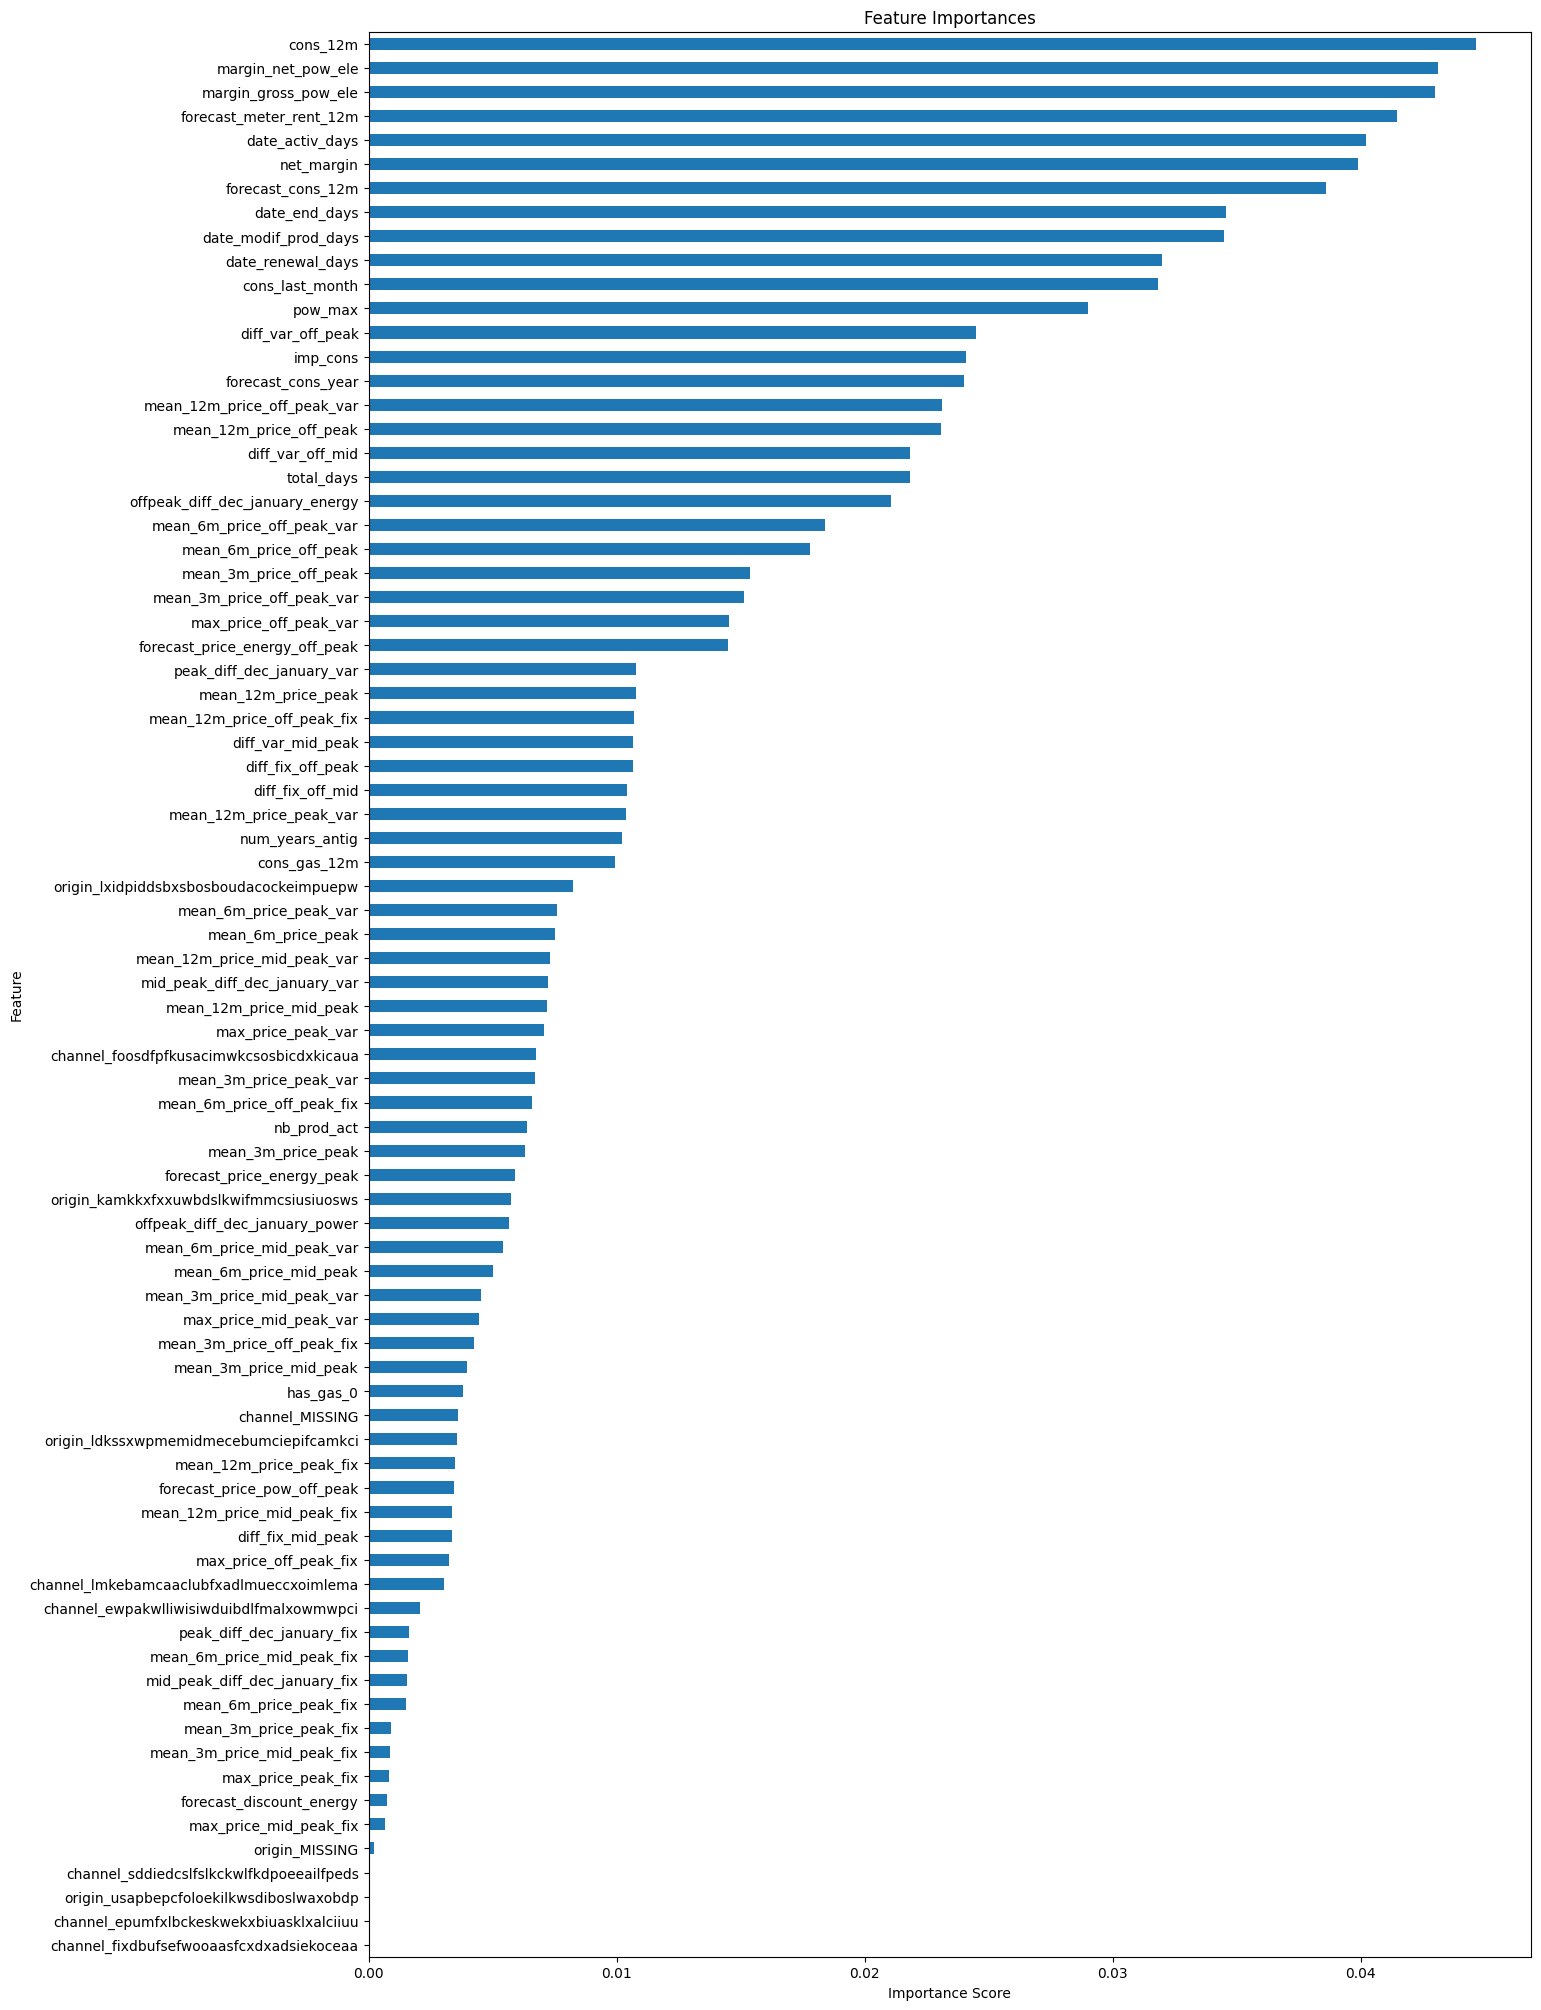

In [125]:
# Get feature importance scores
feature_importance_scores = pd.Series(rf.feature_importances_, index=X_train.columns)

# Convert feature importance scores to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_importance_scores.index, 'Importance Score': feature_importance_scores.values})

# Visualize feature importance
plt.figure(figsize=(15, 25))
feature_importance_scores.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [126]:
feature_importance_df.head()

Feature  Importance Score
0            cons_12m          0.044629
1        cons_gas_12m          0.009936
2     cons_last_month          0.031840
3   forecast_cons_12m          0.038586
4  forecast_cons_year          0.024017

Based on the graph analysis:

- Consumption and net power emerge as primary factors influencing churn.
- Forecasted rents for the next 12 months and net margin also exhibit significant contributions.
- Customer tenure with the company, contract durations, and related factors play crucial roles.
- Additionally, price sensitivity variables appear scattered across the graph, indicating a minor influence on churn.


Looking back at our initial hypothesis:

> Customer churn is sensitive to pricing. Change in prices may cause customers to churn.

It is not. It seems to weakly contribute to churn but does not appear to be a major driver.

For further analysis, we extract the churn probabilities from the test data `X_test` and create a new DataFrame named `churn_probabilities_df`. This DataFrame will be useful for exploring the distribution and characteristics of churn probabilities in the dataset.

In [127]:
# Loading a saved model
import joblib

rf = joblib.load("/content/rf_model_v7.joblib")

In [204]:
churn_prob = rf.predict_proba(X_test)[:, 1]

X_test = X_test_og.reset_index()
X_test.drop(columns='index', inplace=True)

X_test['churn'] = y_pred_1.tolist()
X_test['churn_probability'] = churn_prob.tolist()

X_test.to_csv('predicted_data.csv')

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.5s


## Optional: Impact of Discount

Let's now analyze the impact of a discount on services. The division head has proposed offering a 20% discount to customers who churn. Assuming all of them accept the discount, let's begin the analysis.

We will calculate forecasted revenue for two conditions:
1. No discount offered.
2. 20% discount offered.

However, since it's not feasible to offer a discount to all churned customers, we will set a cut-off condition.

Let's start by loading our data

In [205]:
df = pd.read_csv('/content/predicted_data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  4.173390      4.193598         3.165541           3.168368   
1  4.075036      0.000000         3.003461           3.305998   
2  3.848435      0.000000         0.000000           2.756568   
3  4.345433      0.000000         0.000000           3.516690   
4  4.185655      0.000000         3.355834           3.208148   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            3.165541                       0.0                 2.073828   
1            3.003461                      30.0                 1.255031   
2            0.000000                       0.0                 1.289366   
3            0.000000                       0.0                 1.304921   
4            3.355834                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434                    0.000000   
3                        0.142996                    0.000000   
4                        0.120372                    0.103487   

   forecast_price_pow_off_peak  ...  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                    40.606701  ...                                         0   
1                    46.305378  ...                                         0   
2                    44.311378  ...                                         0   
3                    44.311378  ...                                         0   
4                    40.606701  ...                                         0   

   channel_sddiedcslfslkckwlfkdpoeeailfpeds  origin_MISSING  \
0                                         0               0   
1                                         0               0   
2                                         0               0   
3                                         0               0   
4                                         0               0   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   

   origin_lxidpiddsbxsbosboudacockeimpuepw  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        0   

   origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  churn  \
0                                        0          0      0   
1                                        0          1      0   
2                                        0          1      0   
3                                        0          1      0   
4                                        0          1      0   

   churn_probability  
0           0.064000  
1           0.124000  
2           0.051000  
3           0.084178  
4           0.072000  

[5 rows x 82 columns]

We can calculate the revenue generated by each customer by observing their consumption for the year, multiplying it by the off-peak price, and adding the meter rent to it. Similarly, we can predict the revenue generated by the customer using the forecast columns.

We will use the following formula to estimate the revenue that the customer might generate in the next 12 months:

`forecast_revenue` = `forecast_cons_12m` * `forecast_price_energy_off_peak` + `forecast_meter_rent_12m`

Taking churn into account, assuming that customers churn during the first few months or the first quarter of the year, we can expect anywhere from a 100% loss of revenue if they churn in the first month (January) or a 75.14% loss if they leave in the month of March. We will call this

`forecast_revenue_post_churn` = `forecast_revenue` \* (1 - `avg(1.00, 0.7514)` * `churn`)

`Note`: We must undo the log10 transformation we applied during feature engineering.

In [206]:
import numpy as np

In [207]:
df[high_std] = 10 ** df[high_std] - 1

In [208]:
df['forecast_revenue'] = df["forecast_cons_12m"]  * df['forecast_price_energy_off_peak'] +  df['forecast_meter_rent_12m']

# Taking churn into account
df['forecast_revenue_post_churn'] = df['forecast_revenue'] * (1 - 0.8757 * df['churn'])
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0   14906.0       15616.0           1463.0            1472.56   
1   11885.0           0.0           1007.0            2022.01   
2    7053.0           0.0              0.0             569.91   
3   22152.0           0.0              0.0            3285.17   
4   15333.0           0.0           2268.0            1613.91   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0              1463.0                       0.0                   117.53   
1              1007.0                      30.0                    16.99   
2                 0.0                       0.0                    18.47   
3                 0.0                       0.0                    19.18   
4              2268.0                       0.0                   131.76   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434                    0.000000   
3                        0.142996                    0.000000   
4                        0.120372                    0.103487   

   forecast_price_pow_off_peak  ...  origin_MISSING  \
0                    40.606701  ...               0   
1                    46.305378  ...               0   
2                    44.311378  ...               0   
3                    44.311378  ...               0   
4                    40.606701  ...               0   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   

   origin_lxidpiddsbxsbosboudacockeimpuepw  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        0   

   origin_usapbepcfoloekilkwsdiboslwaxobdp  has_gas_0  churn  \
0                                        0          0      0   
1                                        0          1      0   
2                                        0          1      0   
3                                        0          1      0   
4                                        0          1      0   

   churn_probability  forecast_revenue  forecast_revenue_post_churn  
0           0.064000        286.384038                   286.384038  
1           0.124000        417.542093                   417.542093  
2           0.051000         99.074651                    99.074651  
3           0.084178        488.946169                   488.946169  
4           0.072000        326.029575                   326.029575  

[5 rows x 84 columns]

Let's pick a cut-off probability to be 0.5, which means we will assume customers with a `churn_probability` greater than or equal to 0.5 will churn. Considering this condition: Customers with `churn_probability` greater than or equal to the cut-off get a discount, while the others don't.

Now, we had assumed that customers given the discount won't churn for the next year, meaning we will retain about 80% of the revenue while losing 20% to the discount `retained_revenue` = (1 - `discount`) * `forecast_revenue`. For customers that don't churn `retained_revenue` = `forecast_revenue_post_churn`.

We can calculate the delta (difference) between these two values to get the profit that can be achieved.



In [211]:
def calculate_revenue_delta(df, cutoff=0.5, discount=0.2) -> float:
    # Calculate retained revenue based on churn probability and discount
    df['retained_revenue'] = df['forecast_revenue_post_churn']
    df.loc[df['churn_probability'] >= cutoff, 'retained_revenue'] = df['forecast_revenue'] * (1 - discount)

    # Calculate revenue delta
    df['revenue_delta'] = df['retained_revenue'] - df['forecast_revenue_post_churn']

    # Return the sum of revenue delta
    return df['revenue_delta'].sum()

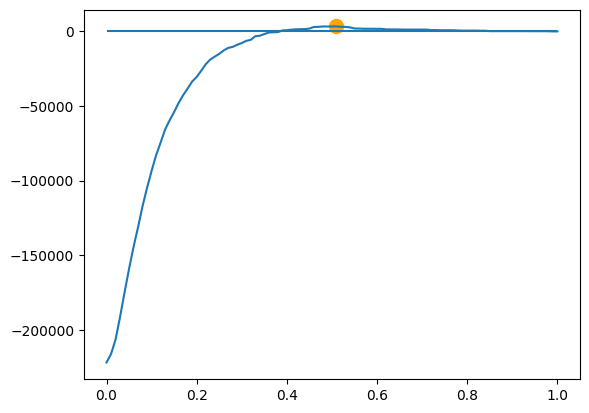

Maximum benefit at cutoff 0.51 with revenue delta of $3,293.06


In [212]:

# Initialize lists to store cutoff values and corresponding revenue deltas
cutoff_values = []
revenue_deltas = []

# Calculate revenue delta for different cutoff values
for cutoff in range(0, 101):
    cutoff_value = cutoff / 100  # Convert to a percentage
    revenue_delta = calculate_revenue_delta(df, cutoff_value, 0.20)  # Discount of 20%
    cutoff_values.append(cutoff_value)
    revenue_deltas.append(revenue_delta)

# Create a pandas Series for revenue deltas
rev_deltas = pd.Series(revenue_deltas, index=cutoff_values)

# Plot the revenue deltas
rev_deltas.plot()

# Mark optimal point
max_pred = rev_deltas.idxmax()
plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')

# Reference line for break-even
plt.hlines(0, 0, 1)

# Show the plot
plt.show()

# Print maximum benefit information
print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

This tells us that we can achieve a profit of about 3.2k dollars using the discount strategy.